In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [5]:
import pickle

In [6]:
with open('df_unsw_train50_with_preprocessing_getdummies_standadscaler', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [7]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (888903, 209)
X teste =  (380959, 209)
y multiclasse treino =  (888903,)
y multiclasse teste =  (380959,)
y binário treino =  (888903,)
y binário teste =  (380959,)


In [8]:
#X_train50_train.head()
X_train50_train

array([[-0.01748416, -0.01043913, -0.22852587, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01451114, -0.05162145, -0.21763962, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.0138642 , -0.07942324, -0.19117479, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       ...,
       [-0.01757447, -0.08518431, -0.24293137, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01757443, -0.08518431, -0.24293137, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01689867,  0.00305292,  0.21032584, ..., -0.00662391,
        -0.1405063 , -0.0077944 ]])

In [9]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

152963      Benign
627588      Benign
37398       Benign
486419      Benign
1203796     Benign
            ...   
110268      Benign
259178      Benign
131932     Generic
671155     Generic
121958      Benign
Name: Label_multiclass, Length: 888903, dtype: object
152963     0
627588     0
37398      0
486419     0
1203796    0
          ..
110268     0
259178     0
131932     1
671155     1
121958     0
Name: Label_binary, Length: 888903, dtype: int64


In [10]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [11]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [12]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [13]:
with open('df_unsw_test50_with_preprocessing_getdummies_standadscaler', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [14]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1269864, 209)
y multiclasse =  (1269864,)
y binário =  (1269864,)


In [15]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [17]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [20]:
#X_test50.head()
X_test50

array([[-0.0175557 , -0.08488696, -0.24198117, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.0175575 , -0.08458962, -0.24188733, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01757438, -0.0823967 , -0.24293137, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       ...,
       [-0.01748007, -0.04924269, -0.22879568, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [ 0.01233876,  0.16659285,  2.97259296, ..., -0.00662391,
        -0.1405063 , -0.0077944 ],
       [-0.01706993,  0.60331879, -0.22310621, ..., -0.00662391,
        -0.1405063 , -0.0077944 ]])

In [21]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['Benign' 'Benign' 'Benign' ... 'Benign' 'Benign' 'Benign']
[0 0 0 ... 0 0 0]


In [22]:
#X_test50.shape

In [23]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

# Algoritmo RandomForest para Train e Validation - Train50

In [24]:
from sklearn.ensemble import RandomForestClassifier

### Predição train50 binária

In [25]:
rforest_train50_binary = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [26]:
rforest_train50_binary.fit(X_train50_train, y_train50_binary_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [27]:
predict_train50_binary = rforest_train50_binary.predict(X_train50_test)

In [28]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9964904359786748

### Visualização da árvore binária

In [66]:
from sklearn import tree
from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

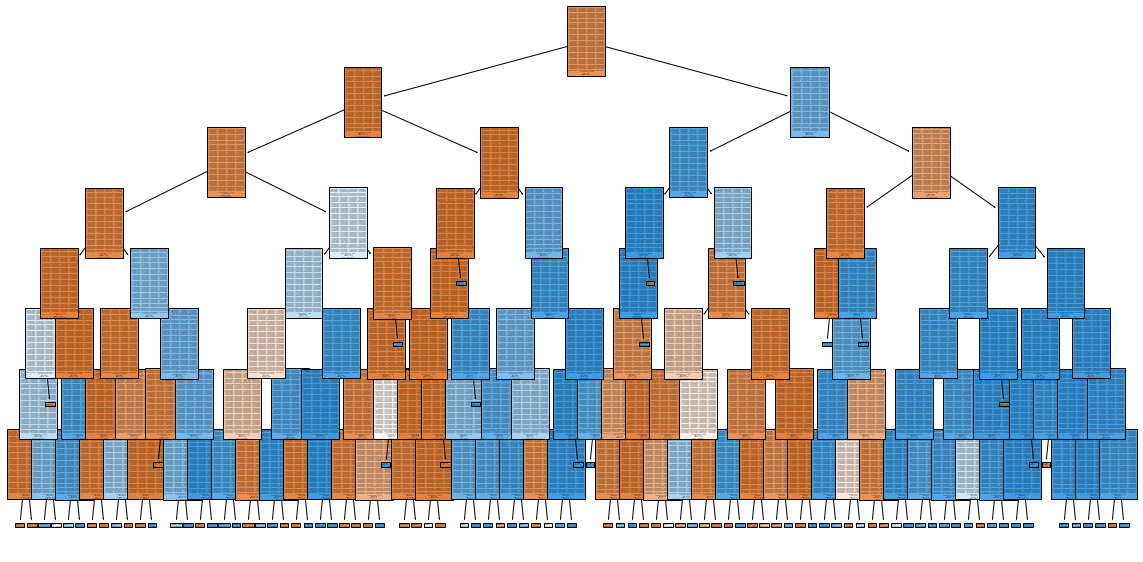

In [32]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_binary.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [64]:
!pip3 install dtreeviz

     |████████████████████████████████| 62 kB 608 kB/s eta 0:00:01
     |████████████████████████████████| 47 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 8.1 MB/s eta 0:00:011
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=e6d9897d22ed67b33c182dff53735e7292ffc03efdfbcfccb7502db70c0946bf
  Stored in directory: /home/kcarvalho/.cache/pip/wheels/b3/ee/0e/7dd46108f92bf77a46d1d2506e512ed898a98906daedb3c411
Successfully built dtreeviz
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [69]:
#viz = dtreeviz(rforest_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train[:,:], target_name='Label_binary')
#viz

### Predição train50 multiclasse

In [34]:
rforest_train50_multiclass = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [35]:
rforest_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [36]:
predict_train50_multiclass = rforest_train50_multiclass.predict(X_train50_test)

In [37]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [38]:
y_train50_multiclass_test

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [39]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9822316837244953

### Visualização da árvore multiclasse

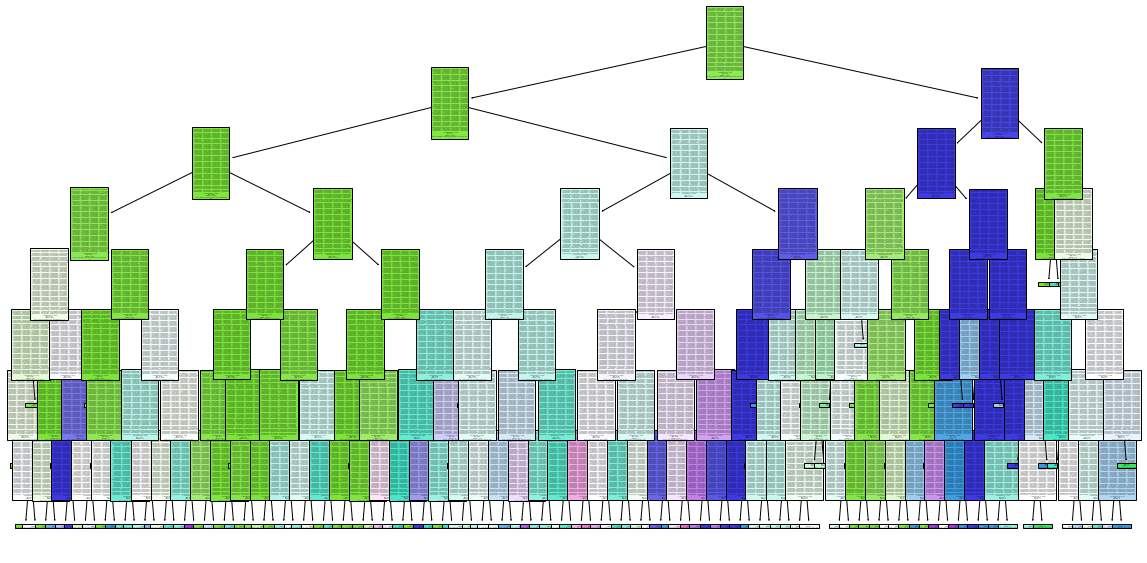

In [40]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_multiclass.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [41]:
#viz = dtreeviz(rforest_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

### Precision e Recall do train50

In [42]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999943  0.996040  0.997987    332789
           1   0.973357  0.999606  0.986307     48170

    accuracy                       0.996490    380959
   macro avg   0.986650  0.997823  0.992147    380959
weighted avg   0.996581  0.996490  0.996510    380959



In [43]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   1.000000  0.000000  0.000000       390
      Backdoor   1.000000  0.000000  0.000000       353
        Benign   0.998532  0.997779  0.998156    332789
           DoS   0.748571  0.053295  0.099506      2458
      Exploits   0.568498  0.950917  0.711582      6703
       Fuzzers   0.706556  0.750484  0.727857      3619
       Generic   0.998760  0.973475  0.985956     32272
Reconnaissance   0.865373  0.694995  0.770882      2118
     Shellcode   0.911765  0.135371  0.235741       229
         Worms   1.000000  0.000000  0.000000        28

      accuracy                       0.982232    380959
     macro avg   0.879806  0.455632  0.452968    380959
  weighted avg   0.985809  0.982232  0.979972    380959



### Cross Validation do train50

In [44]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(rforest_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [45]:
score_cv_train50_binary

array([0.99668133, 0.99640009, 0.99649008, 0.99662504, 0.99679379,
       0.99626505, 0.9963438 , 0.99663629, 0.99660254, 0.9963438 ])

In [46]:
cv_result_train50_binary

[0.996518180254812]

In [47]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(rforest_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [48]:
score_cv_train50_multiclass

array([0.98237167, 0.98277666, 0.98183168, 0.98205647, 0.98168523,
       0.98202272, 0.98213522, 0.98139273, 0.98284396, 0.98197773])

In [49]:
cv_result_train50_multiclass

[0.982109408279886]

### Matriz de Confusão do train50

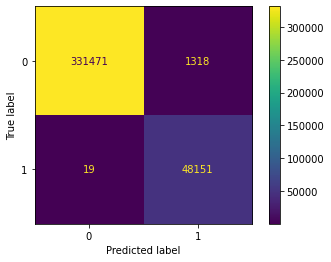

In [50]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

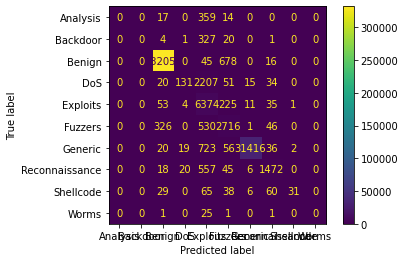

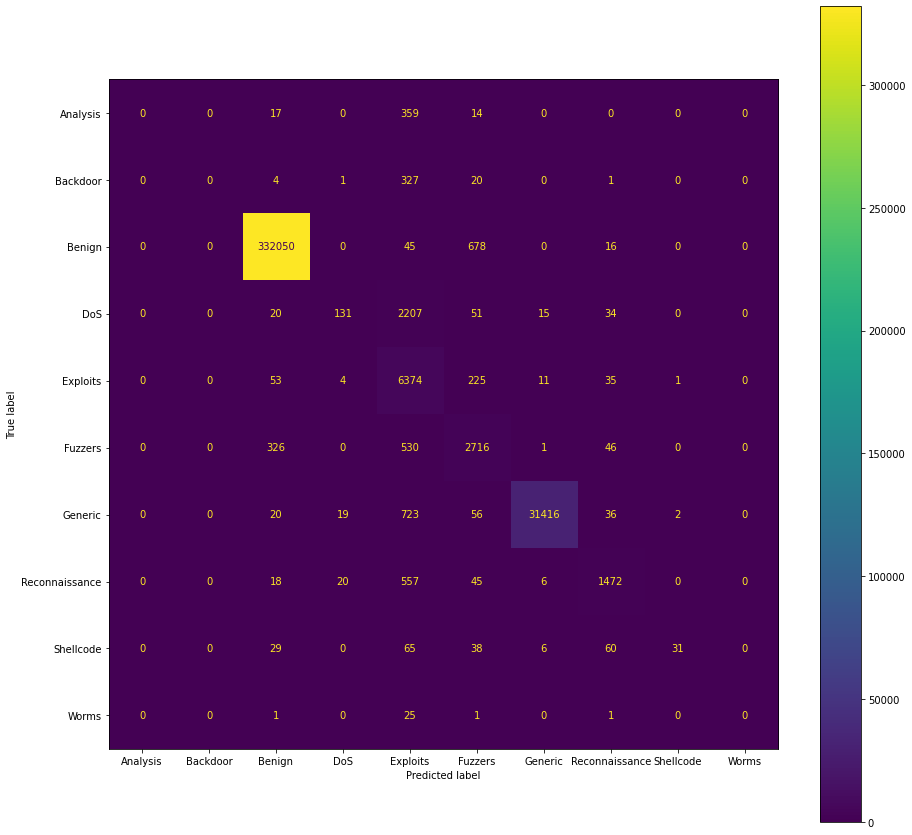

In [51]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)

# Algoritmo RandomForest para Test50

### Predição Test50 binária

In [52]:
predict_test50_binary = rforest_train50_binary.predict(X_test50)

In [53]:
predict_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.7961277743128398

### Predição test50 multiclasse

In [56]:
predict_test50_multiclass = rforest_train50_multiclass.predict(X_test50)

In [57]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [58]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [59]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9625739449263858

### Precision e Recall do test50

In [60]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999999  0.766604  0.867884   1109226
           1   0.382901  0.999994  0.553764    160638

    accuracy                       0.796128   1269864
   macro avg   0.691450  0.883299  0.710824   1269864
weighted avg   0.921936  0.796128  0.828148   1269864



In [61]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   1.000000  0.000000  0.000000      1338
      Backdoor   1.000000  0.000000  0.000000      1164
        Benign   0.999989  0.975322  0.987502   1109226
           DoS   0.340571  0.619618  0.439547      8176
      Exploits   0.559410  0.696209  0.620357     22262
       Fuzzers   0.302732  0.816300  0.441667     12123
       Generic   0.996123  0.977863  0.986909    107740
Reconnaissance   0.667298  0.654512  0.660843      6993
     Shellcode   0.876190  0.121854  0.213953       755
         Worms   1.000000  0.000000  0.000000        87

      accuracy                       0.962574   1269864
     macro avg   0.774231  0.486168  0.435078   1269864
  weighted avg   0.979129  0.962574  0.968004   1269864



### Matriz de Confusão do test50

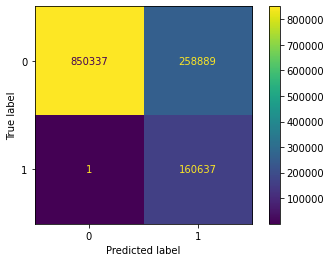

In [62]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_test50, y_test50_binary)
plt.show()

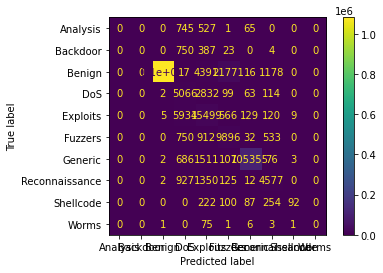

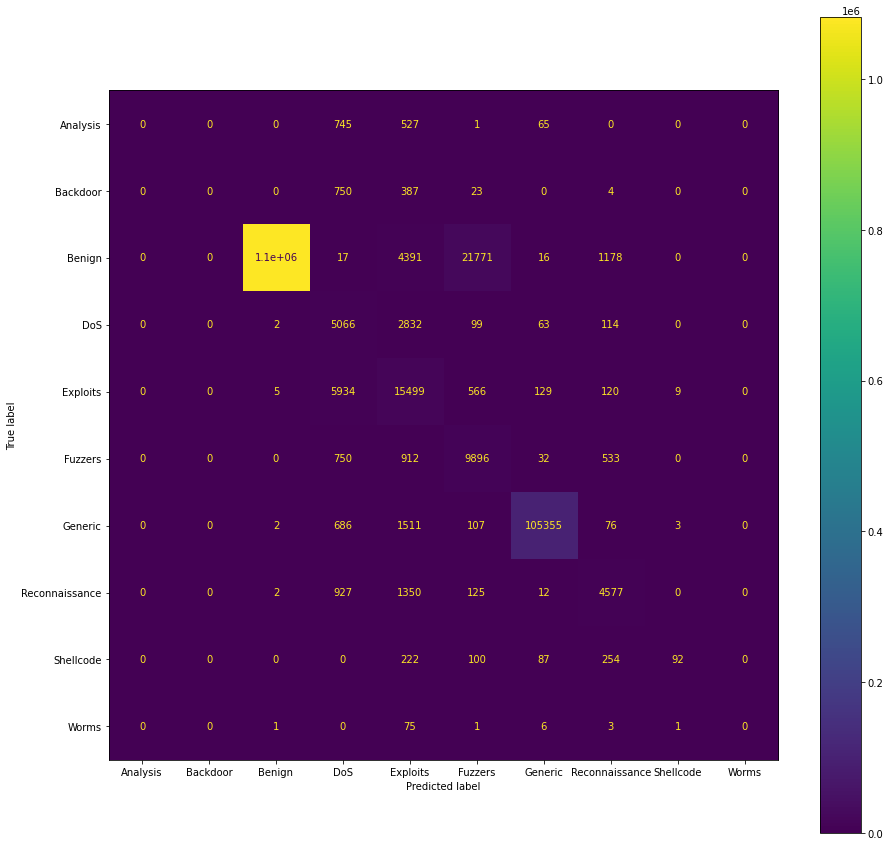

In [63]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)